In [1]:
import numpy as np
import ROOT as r
import sys

Welcome to JupyROOT 6.26/02


In [2]:
sys.path.append("../")
import Cnn_toolr
import Reg_tool

In [3]:
lr = 3

### train dataset

In [4]:
# read npy
tloss = np.load(f"./train_dataset/Conv3D_result/tloss{lr}_filmu.npy")
vloss = np.load(f"./train_dataset/Conv3D_result/vloss{lr}_filmu.npy")

In [5]:
print(vloss.argmin(), vloss.min())

65 0.009455838


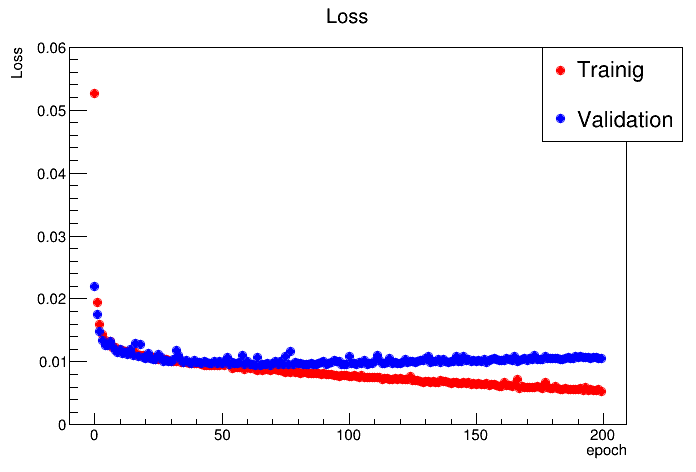

In [6]:
c_loss = r.TCanvas("c_loss")
tmg_loss, leg_loss = Cnn_toolr.plot_loss(tloss, vloss, "tmg_loss")
tmg_loss.GetYaxis().SetRangeUser(0, 0.06)
tmg_loss.Draw("AP")
leg_loss.Draw()
c_loss.Draw()

In [7]:
y_label = np.load(f"./train_dataset/Conv3D_result/y_label{lr}_filmu.npy")
y_output = np.load(f"./train_dataset/Conv3D_result/y_output{lr}_filmu.npy")

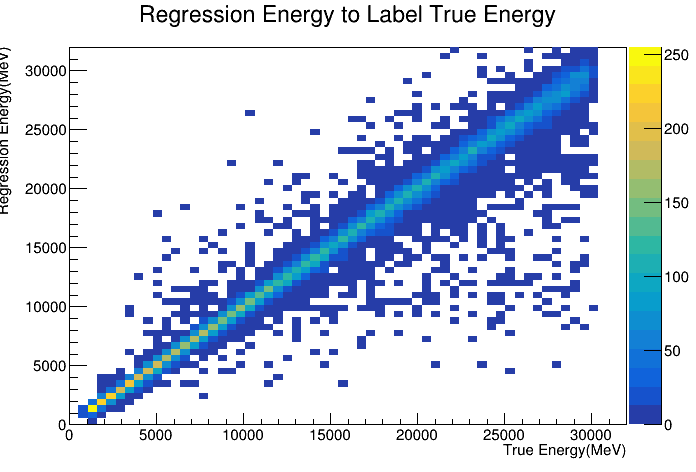

In [8]:
c_test = r.TCanvas("c_test")
h2_test = r.TH2D("h2_test", "Regression Energy to Label True Energy", 60, 0, 32000, 60, 0, 32000)
h2_test.FillN(len(y_label), y_label.astype(np.double), y_output.astype(np.double), np.ones(len(y_label)).astype(np.double))
h2_test.GetXaxis().SetTitle("True Energy(MeV)")
h2_test.GetYaxis().SetTitle("Regression Energy(MeV)")
r.gStyle.SetOptStat(0)
h2_test.Draw("colz")
c_test.Draw()

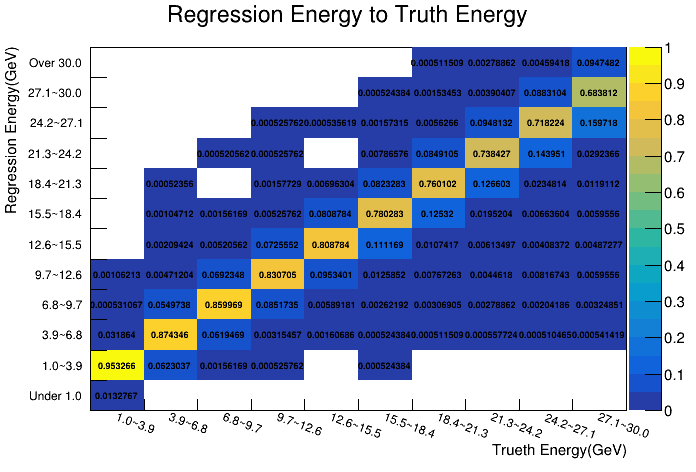

In [9]:
c_test2 = r.TCanvas("c_test2")
h2_test2 = Reg_tool.label_output_per(y_label, y_output, 10, 1000, 30000, 10, 1000, 30000, "h2_test2", "Regression Energy to Truth Energy")
r.gStyle.SetOptStat(0)
h2_test2.SetAxisRange(0, 1, "Z")
h2_test2.Draw("colz TEXT")
c_test2.SetBottomMargin(0.13)
c_test2.SetLeftMargin(0.13)
c_test2.Draw()

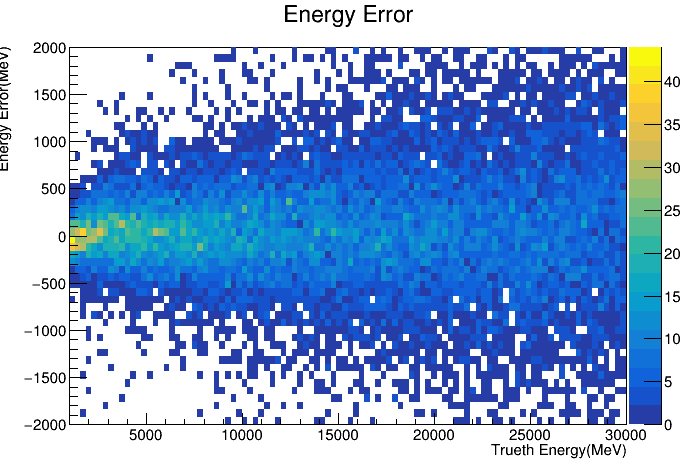

In [10]:
c_error = r.TCanvas("c_error")
h2_error = Reg_tool.energy_error(y_label, y_output, 100, 1000, 30000, 50, 2000, h2label="h2_error", h2name="Energy Error")
h2_error.Draw("colz")
c_error.Draw()

### retesut result

In [11]:
result = r.TFile(f"analysis_3D_{lr}lrmu.root")
result.ls()

TFile**		analysis_3D_3lrmu.root	
 TFile*		analysis_3D_3lrmu.root	
  KEY: TH1D	h1_regenergy0;1	Regression Energy in 2GeV
  KEY: TF1	f1_regenergy0;1	gaus
  KEY: TH1D	h1_regenergy1;1	Regression Energy in 4GeV
  KEY: TF1	f1_regenergy1;1	gaus
  KEY: TH1D	h1_regenergy2;1	Regression Energy in 6GeV
  KEY: TF1	f1_regenergy2;1	gaus
  KEY: TH1D	h1_regenergy3;1	Regression Energy in 8GeV
  KEY: TF1	f1_regenergy3;1	gaus
  KEY: TH1D	h1_regenergy4;1	Regression Energy in 10GeV
  KEY: TF1	f1_regenergy4;1	gaus
  KEY: TH1D	h1_regenergy5;1	Regression Energy in 12GeV
  KEY: TF1	f1_regenergy5;1	gaus
  KEY: TH1D	h1_regenergy6;1	Regression Energy in 14GeV
  KEY: TF1	f1_regenergy6;1	gaus
  KEY: TH1D	h1_regenergy7;1	Regression Energy in 16GeV
  KEY: TF1	f1_regenergy7;1	gaus
  KEY: TH1D	h1_regenergy8;1	Regression Energy in 18GeV
  KEY: TF1	f1_regenergy8;1	gaus
  KEY: TH1D	h1_regenergy9;1	Regression Energy in 20GeV
  KEY: TF1	f1_regenergy9;1	gaus
  KEY: TH1D	h1_regenergy10;1	Regression Energy in 22GeV
  KEY: TF1	f

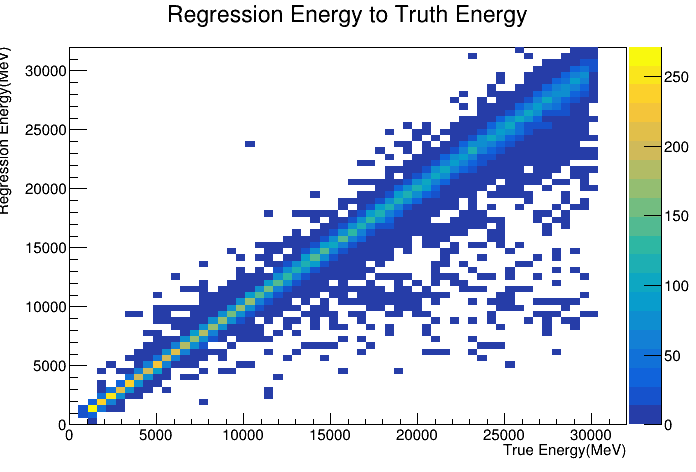

In [12]:
c_labelreg = r.TCanvas("c_labelreg")
h2_labelreg = result.Get("h2_labelreg")
r.gStyle.SetOptStat(0)
h2_labelreg.Draw("colz")
c_labelreg.Draw()

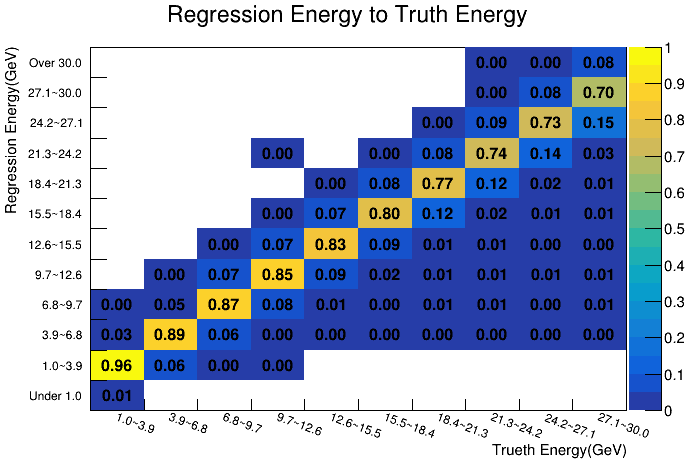

In [13]:
c_labelreg_ratio = r.TCanvas("c_labelreg_ratio")
h2_labelreg_ratio = result.Get("h2_labelreg_ratio")
r.gStyle.SetPaintTextFormat(".2f")
r.gStyle.SetOptStat(0)
h2_labelreg_ratio.SetMarkerSize(1.8)
h2_labelreg_ratio.Draw("colz TEXT")
c_labelreg_ratio.SetBottomMargin(0.13)
c_labelreg_ratio.SetLeftMargin(0.13)
c_labelreg_ratio.Draw()

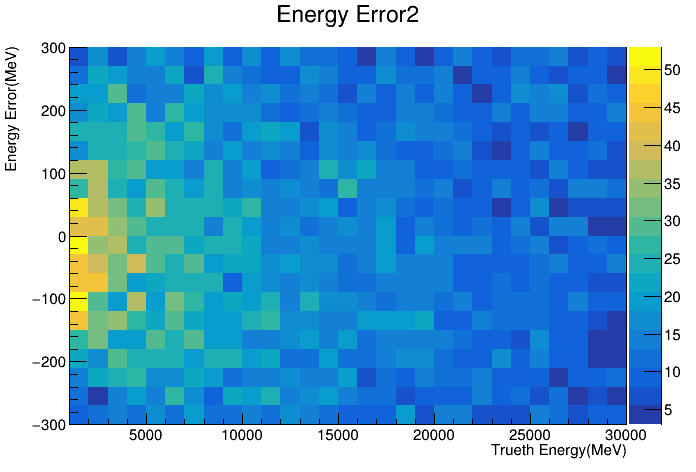

In [14]:
c_shift = r.TCanvas("c_shift")
h2_shift = result.Get("h2_shift")
h2_shift.Draw("colz")
c_shift.Draw()

### test dataset

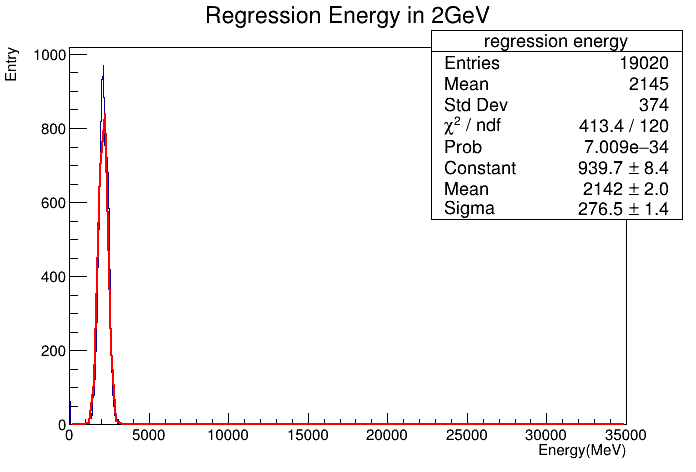

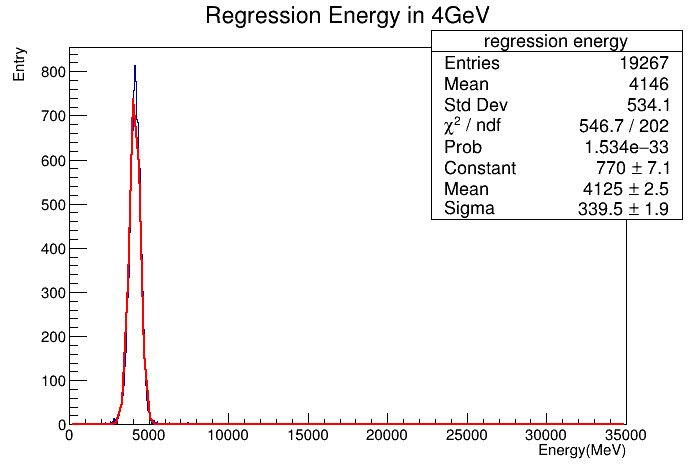

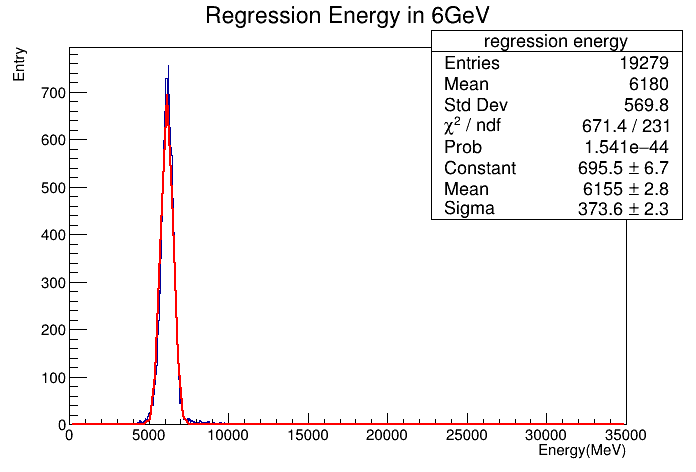

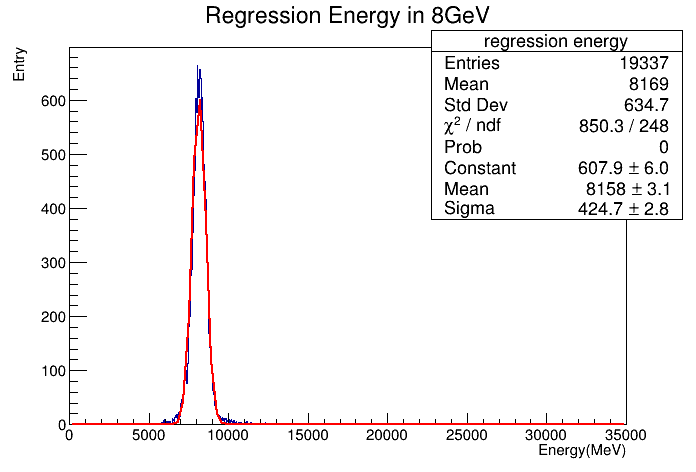

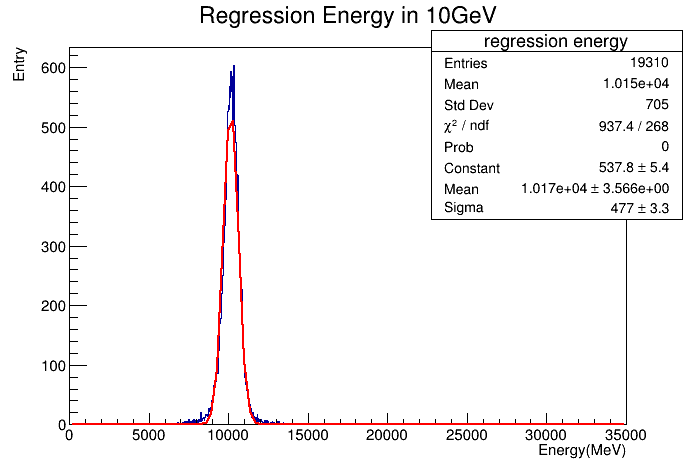

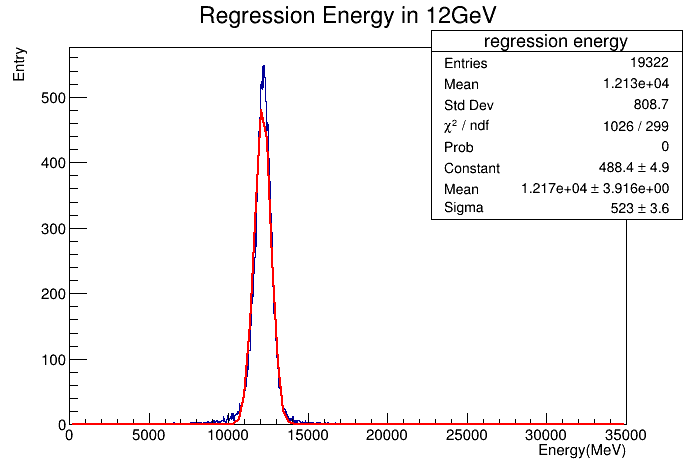

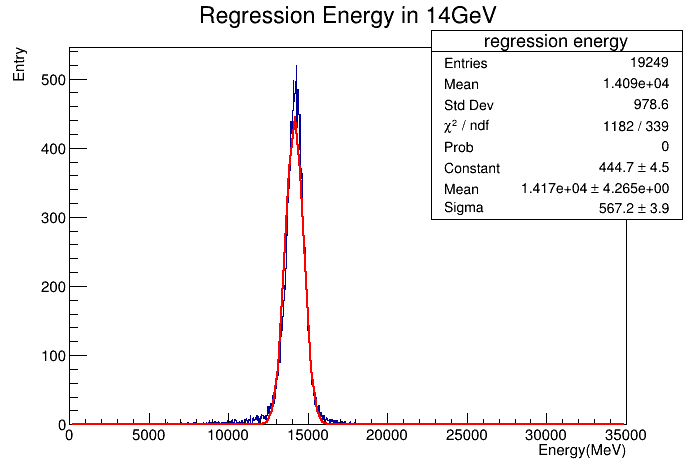

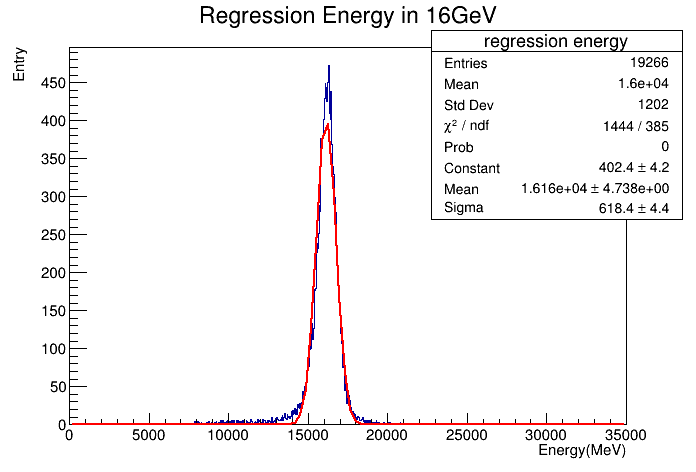

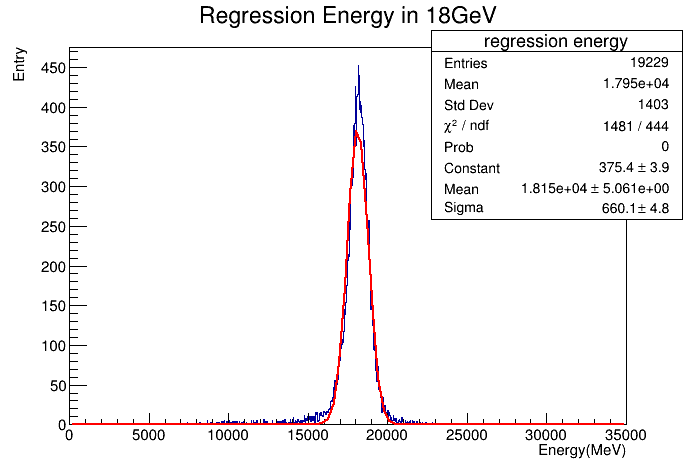

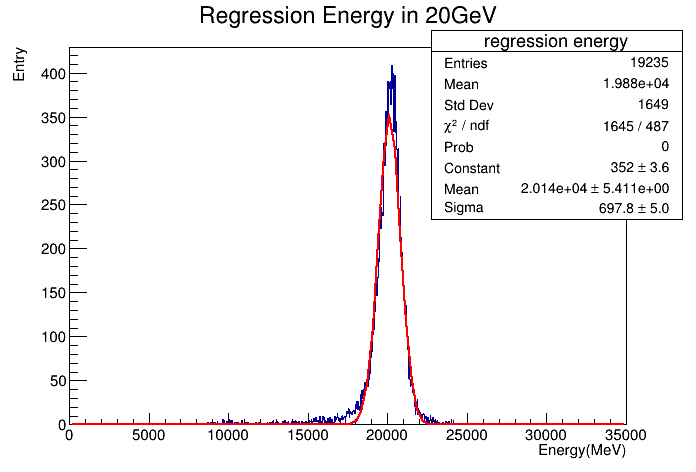

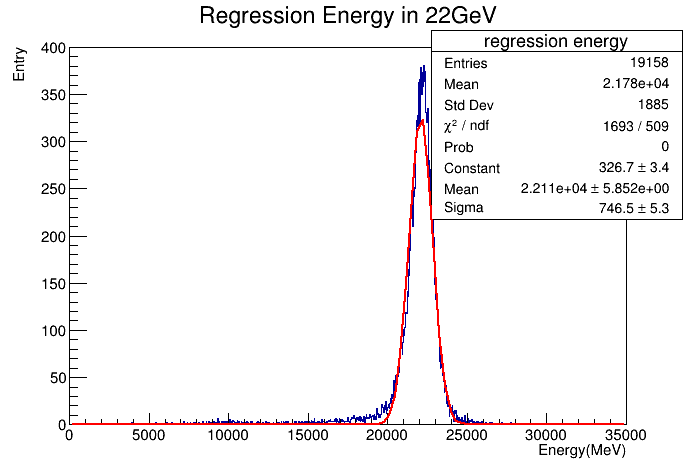

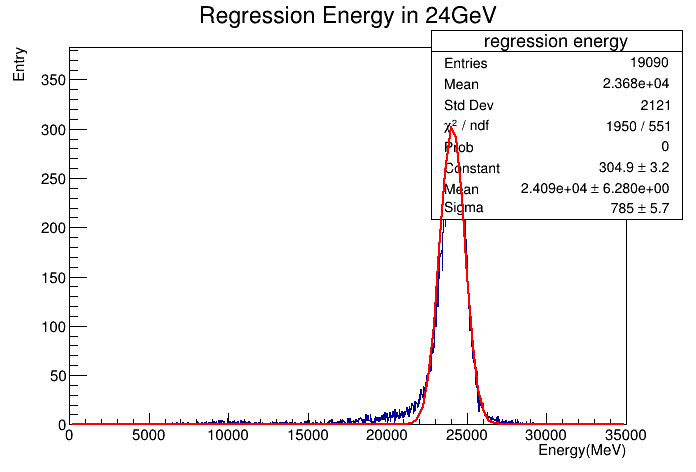

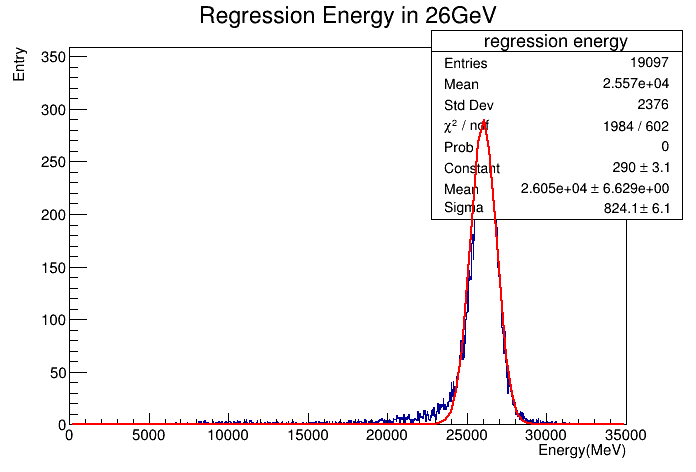

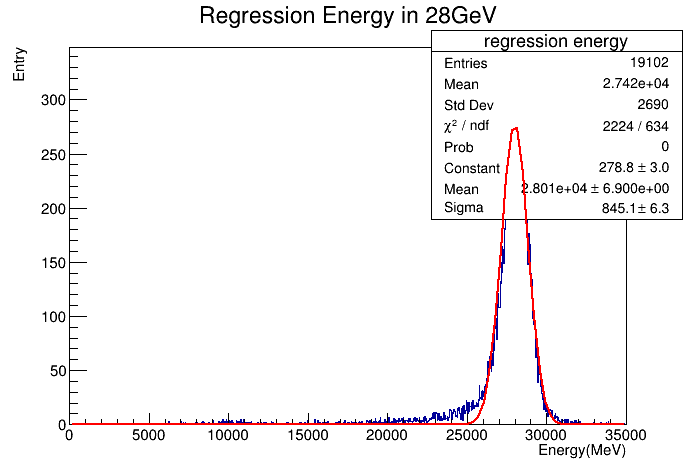

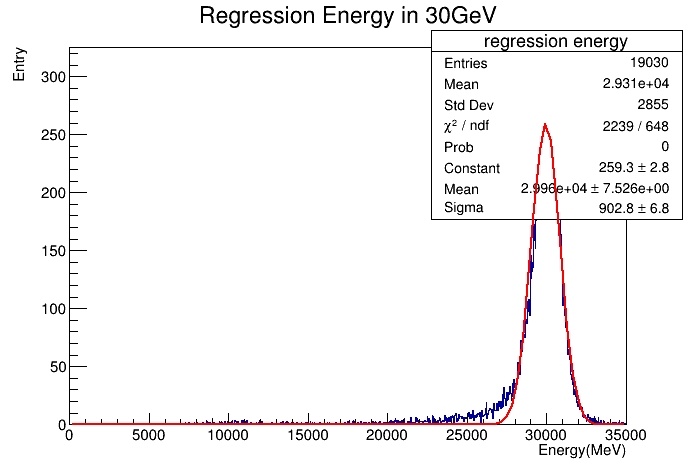

In [15]:
h1_drawop = "HIST"
f1_drawop = "same"
r.gStyle.SetOptFit(1111)
r.gStyle.SetOptStat("nemr")
for i in range(15):
    canvas = f"c_energy{i}"
    exec(f"c_energy{i} = r.TCanvas(canvas)")
    h1_label = f"h1_regenergy{i}"
    f1_label = f"f1_regenergy{i}"
    exec(f"h1_energy{i} = result.Get(h1_label)")
    exec(f"f1_energy{i} = result.Get(f1_label)")
    exec(f"h1_energy{i}.Draw(h1_drawop)")
    exec(f"f1_energy{i}.Draw(f1_drawop)")
    exec(f"c_energy{i}.Draw()")

 FCN=1162.2 FROM MIGRAD    STATUS=CONVERGED      40 CALLS          41 TOTAL
                     EDM=1.29061e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.63152e-01   8.60050e-04   4.56758e-06  -4.97799e-07
   2  p1          -1.72774e-03   2.26187e-04   1.20124e-06  -1.41962e-06


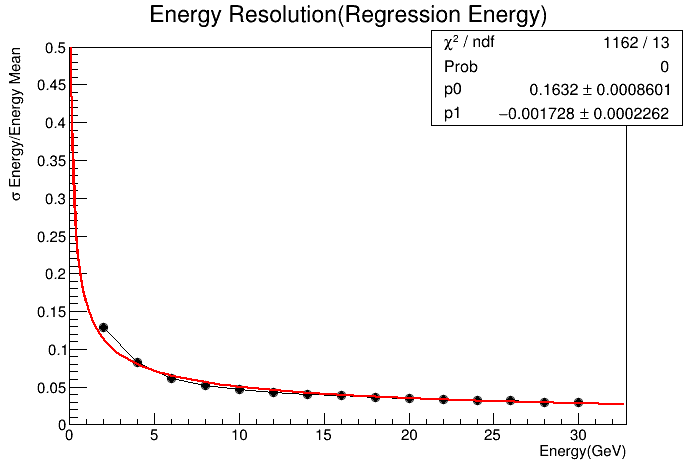

In [16]:
c_resolution = r.TCanvas("c_resolution")
g1_resolution = result.Get("g1_resolution")
f1_resolution = r.TF1("f1_resolution", "[0]/sqrt(x)+[1]")
g1_resolution.Fit("f1_resolution")
r.gStyle.SetOptFit(1111)
g1_resolution.Draw("APL")
f1_resolution.Draw("same")
c_resolution.Draw()

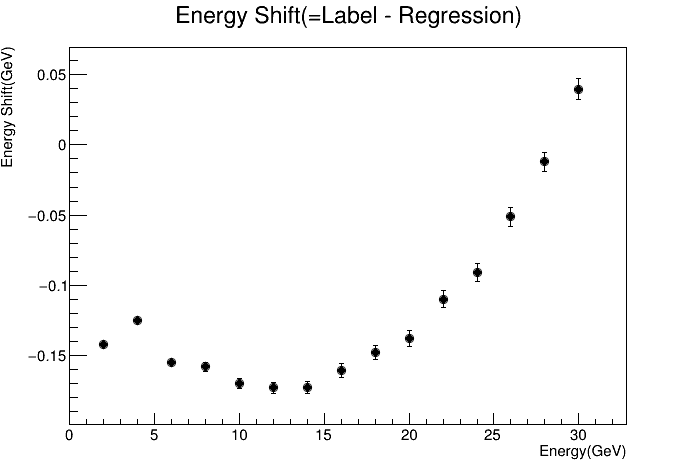

In [17]:
c_meanshift = r.TCanvas("c_meanshift")
g1_meanshift = result.Get("g1_meanshift")
# g1_meanshift.GetYaxis().SetRangeUser(-0.3, 0.25)
# f1_meanshift = r.TF1("f1_meanshift", "[0]*(x+[1])**2+[2]", 0, 30000)
# g1_meanshift.Fit("f1_meanshift")
g1_meanshift.Draw("AP")
c_meanshift.Draw()

 FCN=1096.52 FROM MIGRAD    STATUS=CONVERGED      42 CALLS          43 TOTAL
                     EDM=5.92061e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.97435e-01   1.28218e-04   3.00000e-06  -3.84640e-05
   2  p1           1.63852e-01   1.55872e-03   1.68996e-05  -1.47998e-06


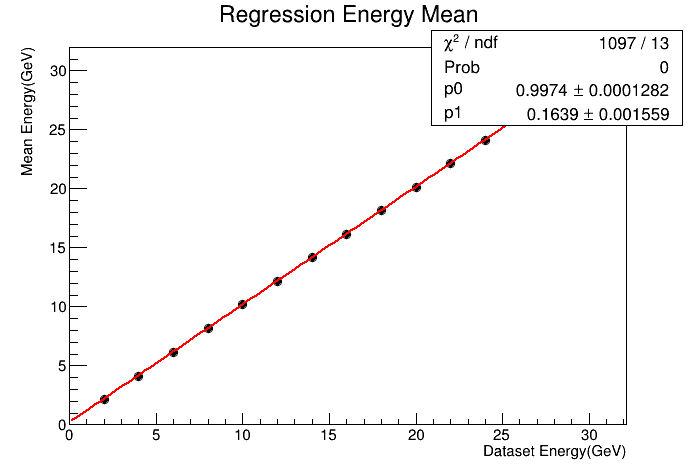

In [18]:
c_mean = r.TCanvas("c_mean")
g1_mean = result.Get("g1_mean")
# g1_mean.GetYaxis().SetRangeUser(-0.3, 0.25)
f1_mean = r.TF1("f1_mean", "[0]*x+[1]", 0, 31000)
g1_mean.Fit("f1_mean")
g1_mean.Draw("AP")
c_mean.Draw()

### read rootファイル

 FCN=855.26 FROM MIGRAD    STATUS=CONVERGED      40 CALLS          41 TOTAL
                     EDM=7.9849e-19    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.87855e-01   1.03614e-03   4.61173e-06  -3.69775e-07
   2  p1          -1.74061e-03   2.67841e-04   1.19212e-06   3.33777e-06


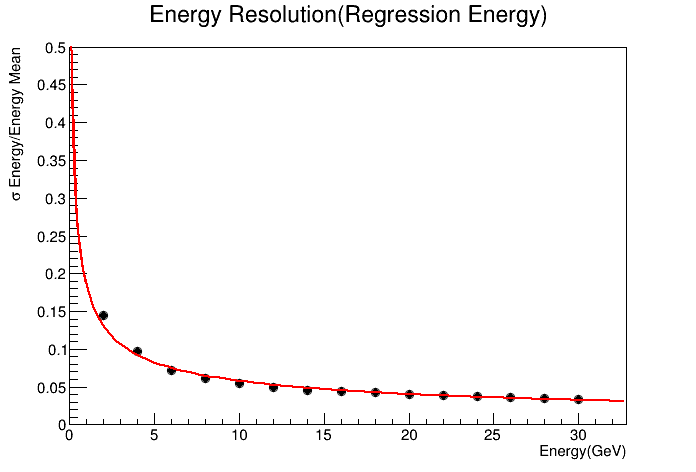

In [19]:
result_classical = r.TFile("../CNN_3cm/analysis_3D_3lrmu.root")
c_gapresolution = r.TCanvas("c_gapresolution")
g1_gapresolution = result_classical.Get("g1_resolution")
f1_gapresolution = r.TF1("f1_gapresolution", "[0]/sqrt(x)+[1]")
g1_gapresolution.Fit("f1_gapresolution")
r.gStyle.SetOptFit(0)
g1_gapresolution.Draw("AP")
f1_gapresolution.Draw("same")
c_gapresolution.Draw()

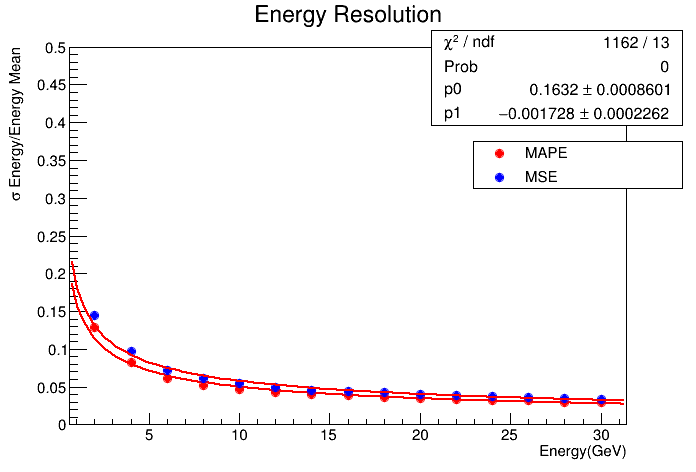

In [20]:
c_compare_resolution = r.TCanvas("c_compare_resolution")
tmg_compare_resolution = r.TMultiGraph("tmg_compare_resolution", "Energy Resolution; Energy(GeV); #sigma Energy/Energy Mean;")
leg_compare_resolution = r.TLegend(0.68, 0.6, 0.98, 0.7)
g1_resolution.SetMarkerColor(2)
tmg_compare_resolution.Add(g1_resolution)
leg_compare_resolution.AddEntry(g1_resolution, "MAPE", "P")
g1_gapresolution.SetMarkerColor(4)
g1_gapresolution.SetTitle("Resolution in Gap Energy")
tmg_compare_resolution.Add(g1_gapresolution)
leg_compare_resolution.AddEntry(g1_gapresolution, "MSE", "P")
tmg_compare_resolution.GetYaxis().SetRangeUser(0, 0.5)
tmg_compare_resolution.Draw("AP")
leg_compare_resolution.Draw()
c_compare_resolution.Draw()

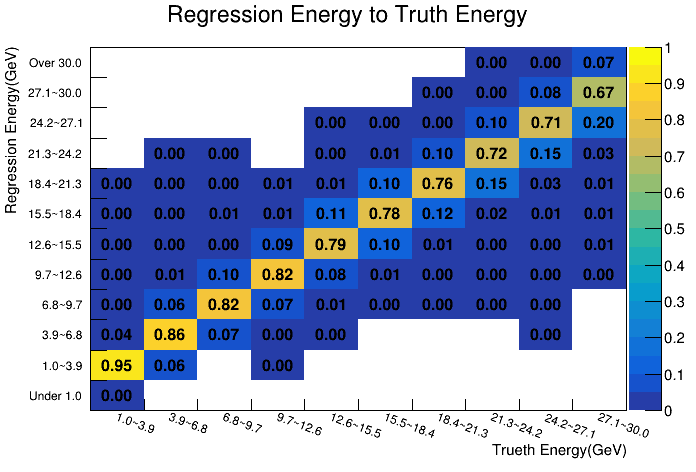

In [21]:
c_labelreg_ratio_gap = r.TCanvas("c_labelreg_ratio_gap")
h2_labelreg_ratio_gap = result_classical.Get("h2_labelreg_ratio")
r.gStyle.SetPaintTextFormat(".2f")
r.gStyle.SetOptStat(0)
h2_labelreg_ratio_gap.SetMarkerSize(1.8)
h2_labelreg_ratio_gap.Draw("colz TEXT")
c_labelreg_ratio_gap.SetBottomMargin(0.13)
c_labelreg_ratio_gap.SetLeftMargin(0.13)
c_labelreg_ratio_gap.Draw()

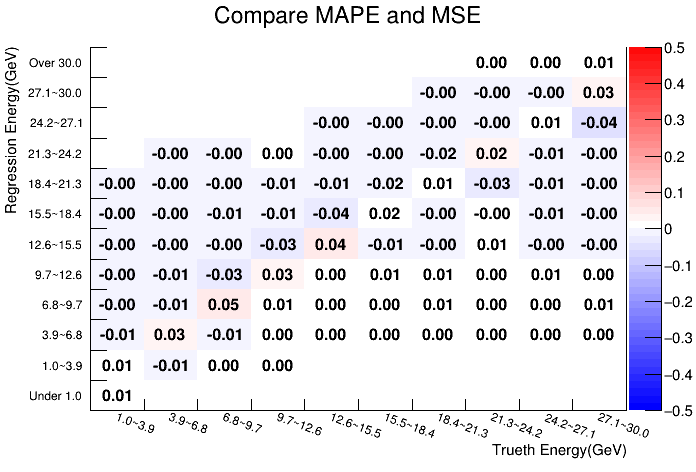

In [22]:
red = np.array([0, 1, 1])
blue = np.array([1, 1, 0])
green = np.array([0, 1, 0])
length = np.array([0, 0.5, 1])
c_cnn_cla = r.TCanvas("c_cnn_cla")
h2_cnn_cla = Reg_tool.label_par_add(
    h2_labelreg_ratio, h2_labelreg_ratio_gap,
    10, 1000, 30000, 10, 1000, 30000, "h2_cnn_cla", "Compare MAPE and MSE")
r.TColor.CreateGradientColorTable(3, length.astype(np.double), red.astype(np.double), green.astype(np.double), blue.astype(np.double), 50)
h2_cnn_cla.SetContour(50)
h2_cnn_cla.SetAxisRange(-0.5, 0.5, "Z")
r.gStyle.SetPaintTextFormat(".2f")
r.gStyle.SetOptStat(0)
h2_cnn_cla.SetMarkerSize(1.8)
c_cnn_cla.SetBottomMargin(0.13)
c_cnn_cla.SetLeftMargin(0.13)
h2_cnn_cla.Draw("colz TEXT")
c_cnn_cla.Draw()

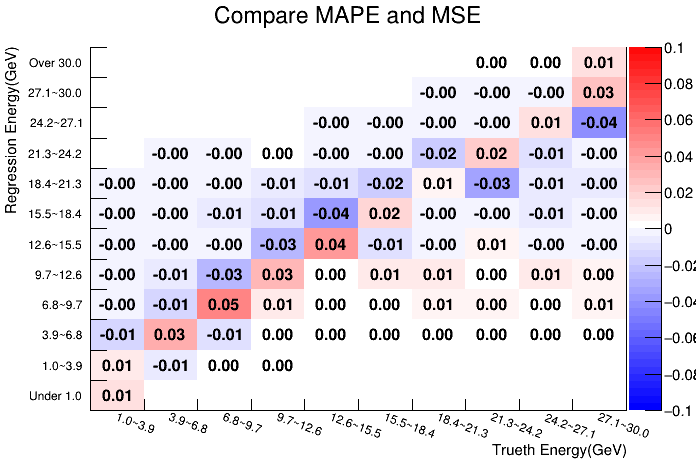

In [23]:
result_default = r.TFile(f"../CNN_3cm/analysis_3D_{lr}lrmu.root")
h2_default = result_default.Get("h2_labelreg_ratio")
c_mape_mse = r.TCanvas("c_mape_mse")
h2_mape_mse = Reg_tool.label_par_add(
    h2_labelreg_ratio, h2_default,
    10, 1000, 30000, 10, 1000, 30000, "h2_test2", "Compare MAPE and MSE")
r.TColor.CreateGradientColorTable(3, length.astype(np.double), red.astype(np.double), green.astype(np.double), blue.astype(np.double), 50)
h2_mape_mse.SetContour(50)
h2_mape_mse.SetAxisRange(-0.1, 0.1, "Z")
r.gStyle.SetPaintTextFormat(".2f")
r.gStyle.SetOptStat(0)
h2_mape_mse.SetMarkerSize(1.8)
c_mape_mse.SetBottomMargin(0.13)
c_mape_mse.SetLeftMargin(0.13)
h2_mape_mse.Draw("colz TEXT")
c_mape_mse.Draw()

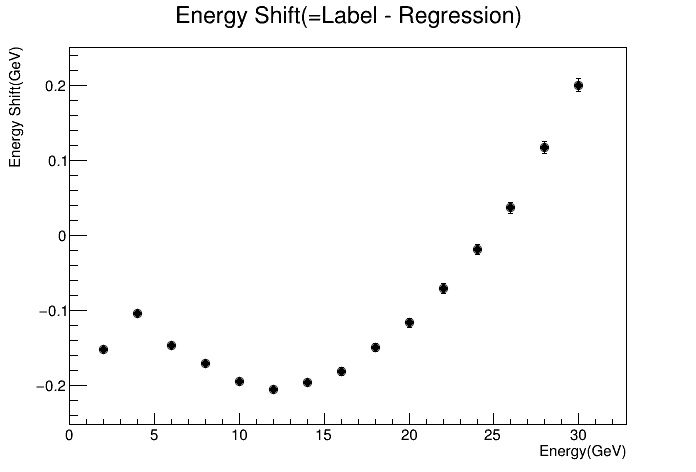

In [24]:
c_meanshift_cla = r.TCanvas("c_meanshift_cla")
g1_meanshift_cla = result_classical.Get("g1_meanshift")
# g1_meanshift_cla.GetYaxis().SetRangeUser(-0.3, 0.25)
# f1_meanshift_cla = r.TF1("f1_meanshift_cla", "[0]*(x+[1])**2+[2]", 0, 30000)
# g1_meanshift_cla.Fit("f1_meanshift_cla")
g1_meanshift_cla.Draw("AP")
c_meanshift_cla.Draw()

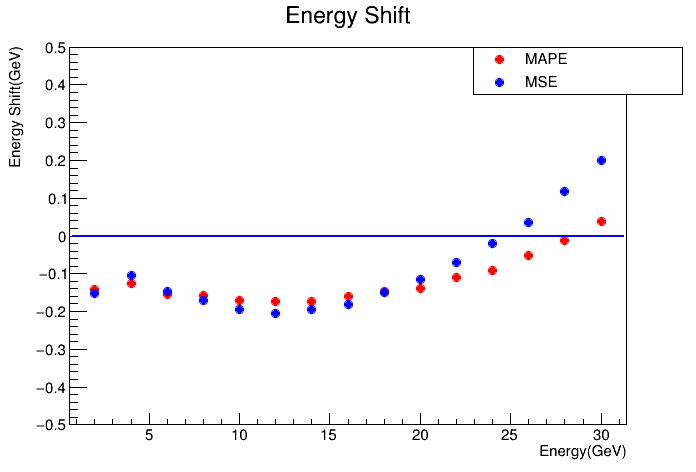

In [25]:
c_compare_shift = r.TCanvas("c_compare_shift")
tmg_compare_shift = r.TMultiGraph("tmg_compare_shift", "Energy Shift; Energy(GeV); Energy Shift(GeV);")
leg_compare_shift = r.TLegend(0.68, 0.8, 0.98, 0.9)
g1_meanshift.SetMarkerColor(2)
f1_resolution.SetLineColor(2)
tmg_compare_shift.Add(g1_meanshift)
leg_compare_shift.AddEntry(g1_meanshift, "MAPE", "P")
g1_meanshift_cla.SetMarkerColor(4)
tmg_compare_shift.Add(g1_meanshift_cla)
leg_compare_shift.AddEntry(g1_meanshift_cla, "MSE", "P")
f1_zeroline = r.TF1("f1_zeroline", "0", 0, 33000)
f1_zeroline.SetLineColor(4)
tmg_compare_shift.Draw("AP")
tmg_compare_shift.GetYaxis().SetRangeUser(-0.5, 0.5)
# f1_resolution.Draw("sama")
# f1_gapresolution.Draw("same")
f1_zeroline.Draw("same")
leg_compare_shift.Draw()
c_compare_shift.Draw()